### Dataset Description

This dataset contains information from a fictional company's CRM system, including:

* Accounts: Details about various customer accounts, including their sector, revenue, and location.
* Products: Information on the products being sold, including product series and sales price.
* Sales Pipeline: Data on sales opportunities, including the sales agent, product, account, deal stage, engagement and close dates, and close value.
* Sales Teams: Information about the sales agents, their managers, and regional offices.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### 1. Load the Data

In [2]:
# Load the data
accounts = pd.read_csv("/content/drive/MyDrive/archive (9)/accounts.csv")
products = pd.read_csv("/content/drive/MyDrive/archive (9)/products.csv")
sales_pipeline = pd.read_csv("/content/drive/MyDrive/archive (9)/sales_pipeline.csv")
sales_teams = pd.read_csv("/content/drive/MyDrive/archive (9)/sales_teams.csv")

### 2. Cleaning the Data

#### 2.1 Handling Outliers

In [3]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [4]:
# understanding null count of accounts data
accounts.isnull().sum()

,0
account,0
sector,0
year_established,0
revenue,0
employees,0
office_location,0
subsidiary_of,70


In [5]:
# fill null values as unknown
accounts['subsidiary_of'] = accounts['subsidiary_of'].fillna('Unknown')
accounts.isnull().sum()

,0
account,0
sector,0
year_established,0
revenue,0
employees,0
office_location,0
subsidiary_of,0


In [6]:
# understanding null count of products data
products.isnull().sum()

,0
product,0
series,0
sales_price,0


In [7]:
sales_pipeline.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,1425
deal_stage,0
engage_date,500
close_date,2089
close_value,2089


In [8]:
deal_group = sales_pipeline.groupby('deal_stage')

for deal,group in deal_group:
  print(f"\nEntries for Deal Stage: {deal}")
  print(group)


Entries for Deal Stage: Engaging
     opportunity_id      sales_agent         product    account deal_stage  \
9          HAXMC4IX   James Ascencio     MG Advanced        NaN   Engaging   
25         UP409DSB  Maureen Marcano     MG Advanced  Ganjaflex   Engaging   
42         EG7OFLFR    Kami Bicknell       GTX Basic        NaN   Engaging   
44         OLVI7L8M     Cassey Cress          GTXPro        NaN   Engaging   
56         F5U1ACDD    Kami Bicknell  GTX Plus Basic        NaN   Engaging   
...             ...              ...             ...        ...        ...   
8277       NGTVHTFH        Boris Faz          GTXPro        NaN   Engaging   
8283       HB740BLB    Hayden Neloms      MG Special      Silis   Engaging   
8285       HCQK8NQ8   Wilburn Farren  GTX Plus Basic        NaN   Engaging   
8286       RDHTQLNI     Cassey Cress    GTX Plus Pro        NaN   Engaging   
8290       DB801ISB     Elease Gluck      MG Special        NaN   Engaging   

     engage_date close_date  

We can see only 'Prospecting' and 'Engaging' deal stages have Nan Values for

account
engage_date
close_date
close_value

As both those deal stages have significance in analysis, we wont be removing them. Instead we will replace NAN's with unknown.

In [9]:
sales_pipeline['account'] = sales_pipeline['account'].fillna('Unknown')
sales_pipeline['engage_date'] = sales_pipeline['engage_date'].fillna('Unknown')
sales_pipeline['close_date'] = sales_pipeline['close_date'].fillna('Unknown')
sales_pipeline['close_value'] = sales_pipeline['close_value'].fillna(0)
sales_pipeline.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,0
deal_stage,0
engage_date,0
close_date,0
close_value,0


In [10]:
sales_teams.isnull().sum()

,0
sales_agent,0
manager,0
regional_office,0


#### 2.2 Handling Duplicates

In [11]:
sales_pipeline.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [12]:
# Check for duplicates
print(sales_teams.duplicated().sum())

0


#### 2.3 Correcting Data Types

Converting Dates in datetime format.

In [13]:
sales_pipeline['engage_date'] = pd.to_datetime(sales_pipeline['engage_date'], errors='coerce')
sales_pipeline['close_date'] = pd.to_datetime(sales_pipeline['close_date'], errors='coerce')

Converting Numeric Field in the correct format.

In [14]:
accounts['revenue'] = pd.to_numeric(accounts['revenue'], errors='coerce')
accounts['employees'] = pd.to_numeric(accounts['employees'], errors='coerce')
sales_pipeline['close_value'] = pd.to_numeric(sales_pipeline['close_value'], errors='coerce')
products['sales_price'] = pd.to_numeric(products['sales_price'], errors='coerce')

#### 2.4 Handling Outliers

In [15]:
fig = px.box(accounts,y='revenue')
fig.show()

In [16]:
# Calculate the 99th percentile of the revenue
revenue_threshold = accounts['revenue'].quantile(0.99)

# Identify the outlier
outliers = accounts[accounts['revenue'] > revenue_threshold]
print(outliers)

     account    sector  year_established   revenue  employees office_location  \
41  Kan-code  software              1982  11698.03      34288   United States   

   subsidiary_of  
41       Unknown  


In [17]:
# Remove the outlier(s)
accounts = accounts[accounts['revenue'] <= revenue_threshold]

### 3. EDA

#### 3.1 Sales Performance Analysis

**Total Sales by Sales Agent**

*  The scatter plot will show which sales agents have the highest total sales, allowing us to identify the top performers in the team.

In [18]:
sales_agent = sales_pipeline[sales_pipeline['deal_stage']=='Won'].groupby('sales_agent')['close_value'].sum().sort_values(ascending=True)

In [19]:
import plotly.express as px

fig = px.scatter(
    y=sales_agent.values,
    x=sales_agent.index,
    color=sales_agent.values,
    color_continuous_scale='Viridis',
    labels={'x': 'Sales Agent', 'y': 'Total Sales'},
    title='Total Sales by Sales Agent'
)
fig.show()


Outcome :

*  Darcel Schlecht made the highest sales with 1.15M, whereas Violet Mclelland made the lowest with 123.431k

**Total Sales by Product**

* The bar plot identifies the most successful products in terms of sales, guiding future product development and marketing strategies.

<ipython-input-20-e832d6e7d43a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




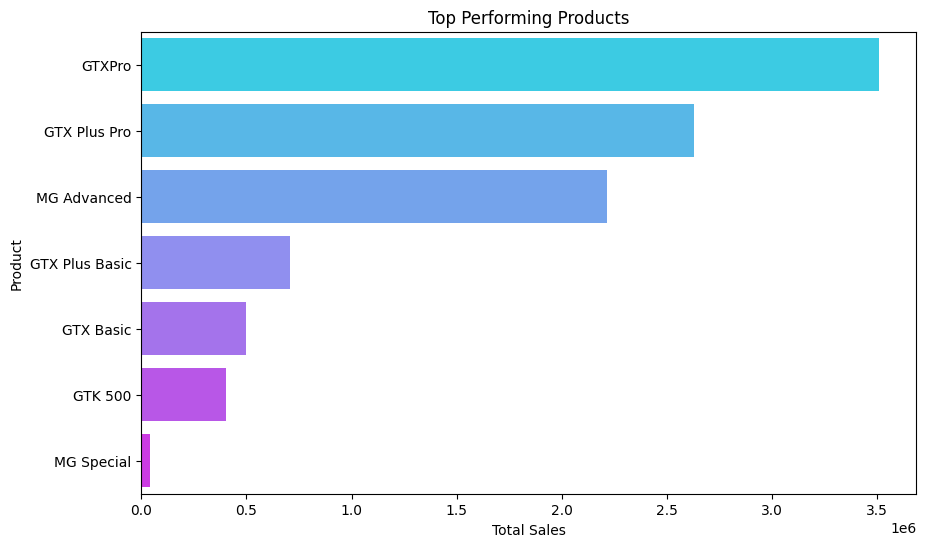

In [20]:
top_products = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby('product')['close_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="cool")
plt.title('Top Performing Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

Outcome

* GTXPro has highest popularity and profitability

#### 3.2 Account Analysis

**Revenue Distribution**

* Histogram shows distrbution of revenue

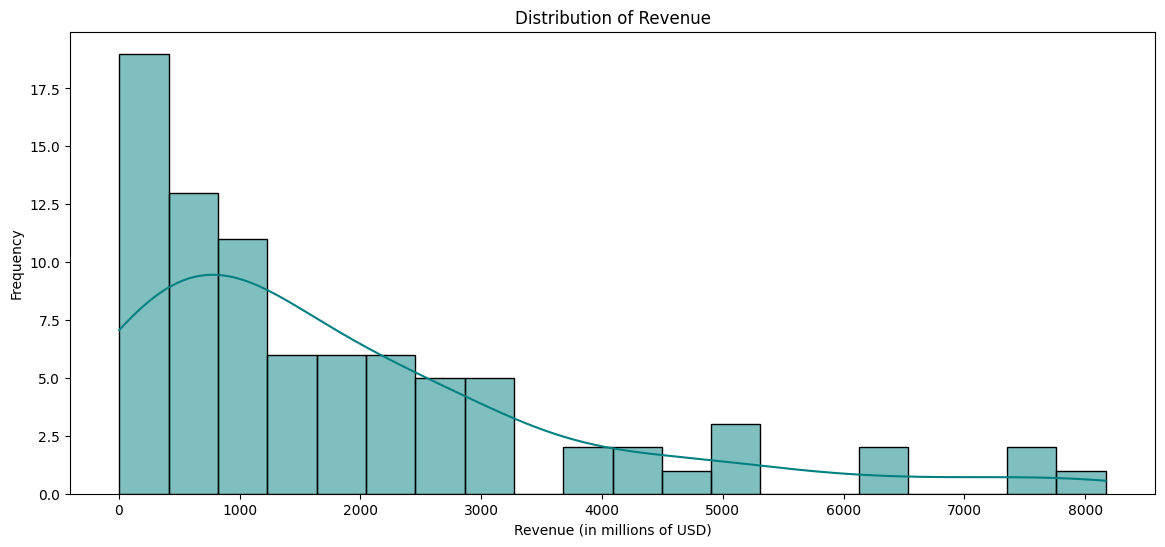

In [21]:
plt.figure(figsize=(14, 6))
sns.histplot(data = accounts, x='revenue',bins=20,kde=True,color='#008080')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in millions of USD)')
plt.ylabel('Frequency')
plt.show()

**Employees Distribution by Sector**

* The below bar graph will show sector wise employee distribution

In [22]:
plt.figure(figsize=(14,6))
fig = px.bar(accounts, x='sector', y= 'employees',
             title='Distribution of Employees by Sector')
fig.show()

<Figure size 1400x600 with 0 Axes>

Outcome

* Retail has highest no of employess & services has lowest no of employees

**Revenue Distribution by Sector**

* Understand revenue distribution of different sectors

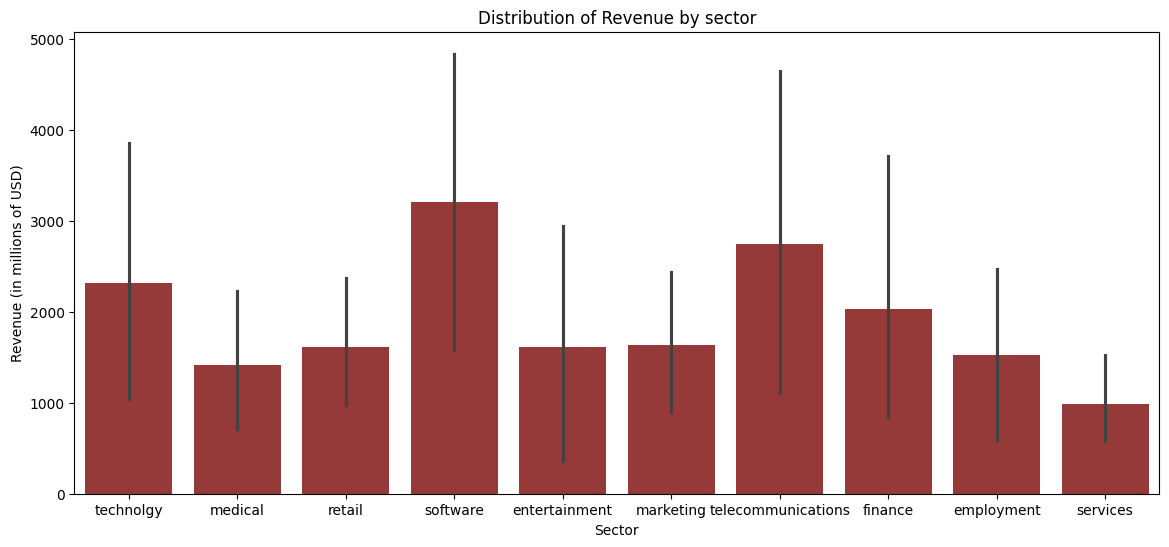

In [23]:
plt.figure(figsize=(14, 6))
sns.barplot(data = accounts, x='sector',y='revenue',color='#A52A2A')
plt.title('Distribution of Revenue by sector')
plt.xlabel('Sector')
plt.ylabel('Revenue (in millions of USD)')
plt.show()

Outcome

* The software sector has made biggest revenue

#### 3.3 Product Performance Analysis

Product top Sales by 5 Accounts

* The heatmap shows the relationship between Top 5 accounts and the products they purchase, helping tailor sales pitches and account management strategies.

In [24]:
# Calculate total sales by account
total_sales_by_account = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby('account')['close_value'].sum()

# Identify the top 5 accounts
top_5_accounts = total_sales_by_account.nlargest(5).index

In [25]:
# Filter the product sales data to include only the top 5 accounts
top_5_product_sales_by_account = sales_pipeline[(sales_pipeline['deal_stage'] == 'Won') & (sales_pipeline['account'].isin(top_5_accounts))].groupby(['account', 'product'])['close_value'].sum().unstack().fillna(0)

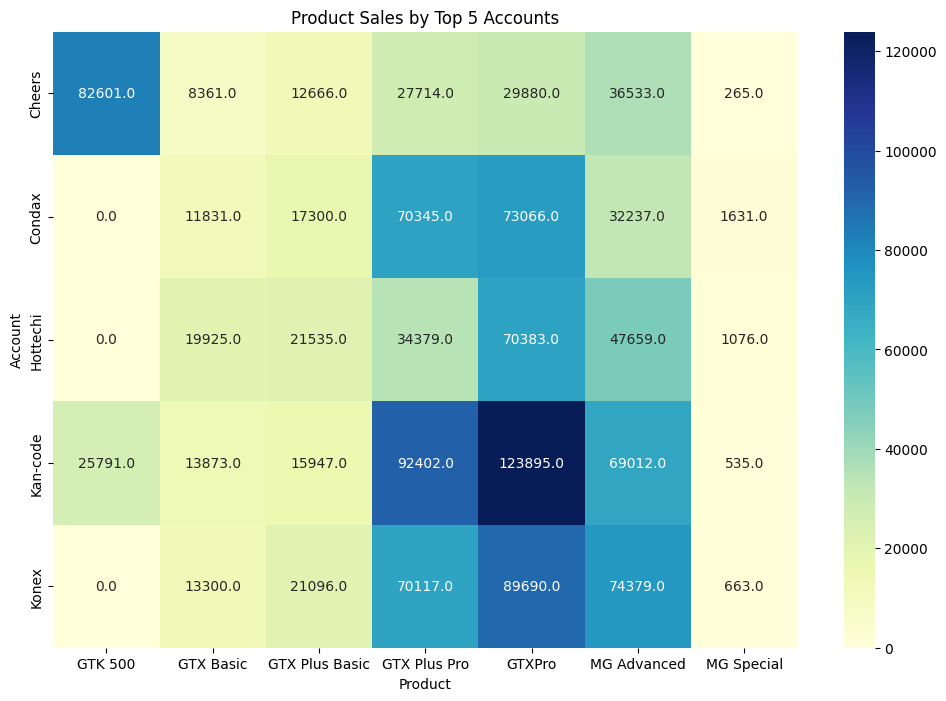

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(top_5_product_sales_by_account, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Product Sales by Top 5 Accounts')
plt.xlabel('Product')
plt.ylabel('Account')
plt.show()

#### 3.4 Employee and Office Analysis

Average Revenue per Employee by 5 Accounts

* This analysis highlights the productivity of employees at top 5 accounts, providing insights into operational efficiency and staffing needs.

<ipython-input-27-cfe53b6dd28c>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




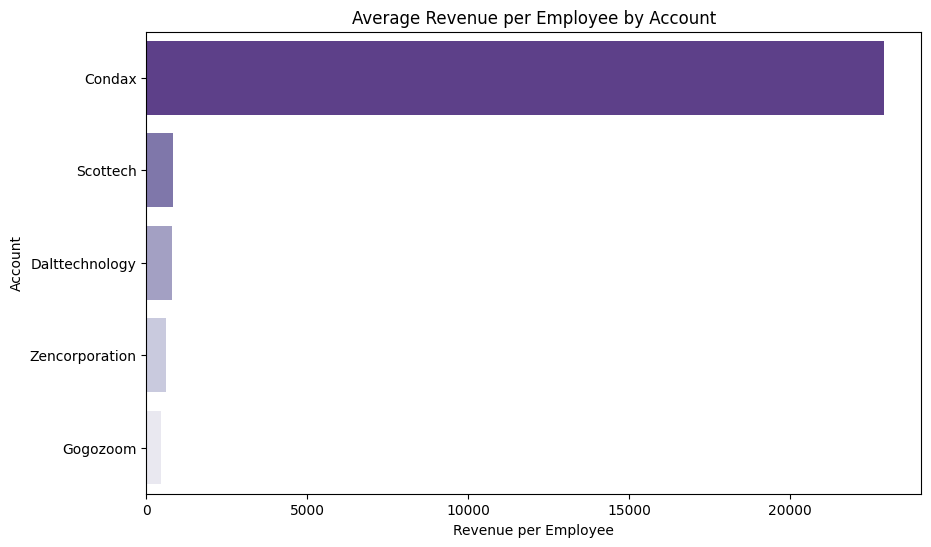

In [27]:
merged_data = pd.merge(sales_pipeline, accounts, on='account')
merged_data['revenue_per_employee'] = merged_data['close_value'] / merged_data['employees']

revenue_per_employee = merged_data.groupby('account')['revenue_per_employee'].sum().sort_values(ascending=False)

top_5_revenue_per_employee = revenue_per_employee.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_revenue_per_employee.values, y=top_5_revenue_per_employee.index, palette="Purples_r")
plt.title('Average Revenue per Employee by Account')
plt.xlabel('Revenue per Employee')
plt.ylabel('Account')
plt.show()

Revenue by Office Location

* The bar plot shows which office locations generate the most revenue, informing decisions on where to focus resources or expand operations.

<ipython-input-28-3da3b486c1f3>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




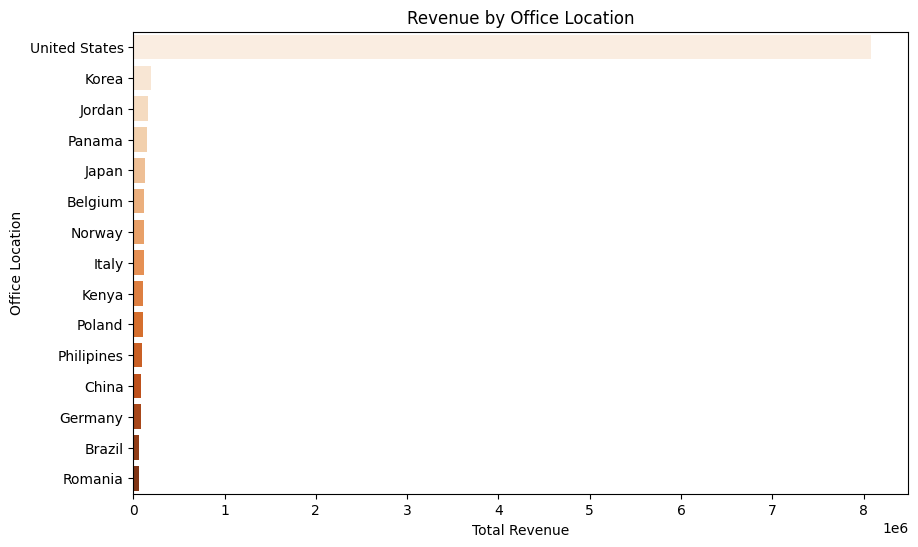

In [28]:
revenue_by_location = merged_data.groupby('office_location')['close_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_location.values, y=revenue_by_location.index, palette="Oranges")
plt.title('Revenue by Office Location')
plt.xlabel('Total Revenue')
plt.ylabel('Office Location')
plt.show()

#### 3.5 Time-Based Analysis

Monthly Sales Trends

* The line plot helps visualize sales trends over time, enabling better forecasting and identification of seasonal patterns or market shifts.

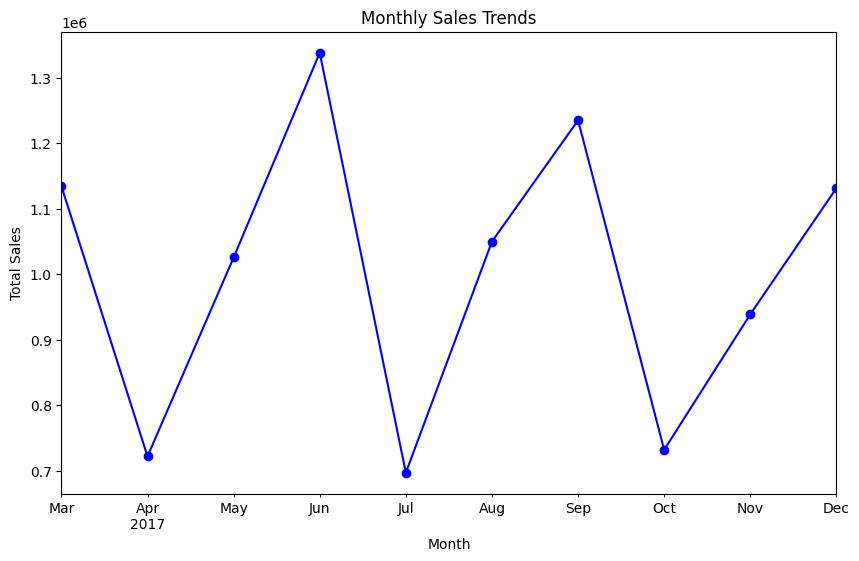

In [29]:
sales_pipeline['engage_date'] = pd.to_datetime(sales_pipeline['engage_date'])
sales_pipeline['close_date'] = pd.to_datetime(sales_pipeline['close_date'])

monthly_sales = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby(pd.Grouper(key='close_date', freq='M'))['close_value'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Sales Cycle Duration

* By calculating the average time taken to close deals, this analysis helps in optimizing the sales process and setting realistic targets.

In [30]:
sales_pipeline['sales_cycle_days'] = (sales_pipeline['close_date'] - sales_pipeline['engage_date']).dt.days
average_sales_cycle = sales_pipeline[sales_pipeline['deal_stage'] == 'Won']['sales_cycle_days'].mean()

print(f"Average Sales Cycle Duration: {average_sales_cycle:.2f} days")


Average Sales Cycle Duration: 51.78 days


#### 3.6 Deal Analysis

Lost Deal Analysis

* The bar plot shows which sales agents have the most lost deals, helping to identify areas for improvement in training or support.

<ipython-input-31-472f99ca0621>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




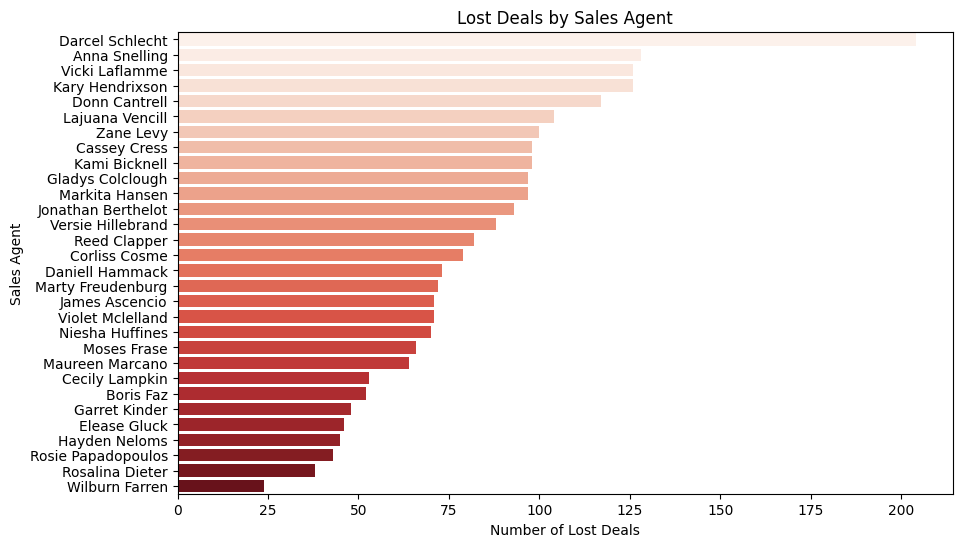

In [31]:
lost_deals = sales_pipeline[sales_pipeline['deal_stage'] == 'Lost'].groupby('sales_agent')['close_value'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=lost_deals.values, y=lost_deals.index, palette="Reds")
plt.title('Lost Deals by Sales Agent')
plt.xlabel('Number of Lost Deals')
plt.ylabel('Sales Agent')
plt.show()

Deals by Sales Agent and Product

* The heatmap reveals which sales agents are successful with particular products, guiding targeted training and strategy development.

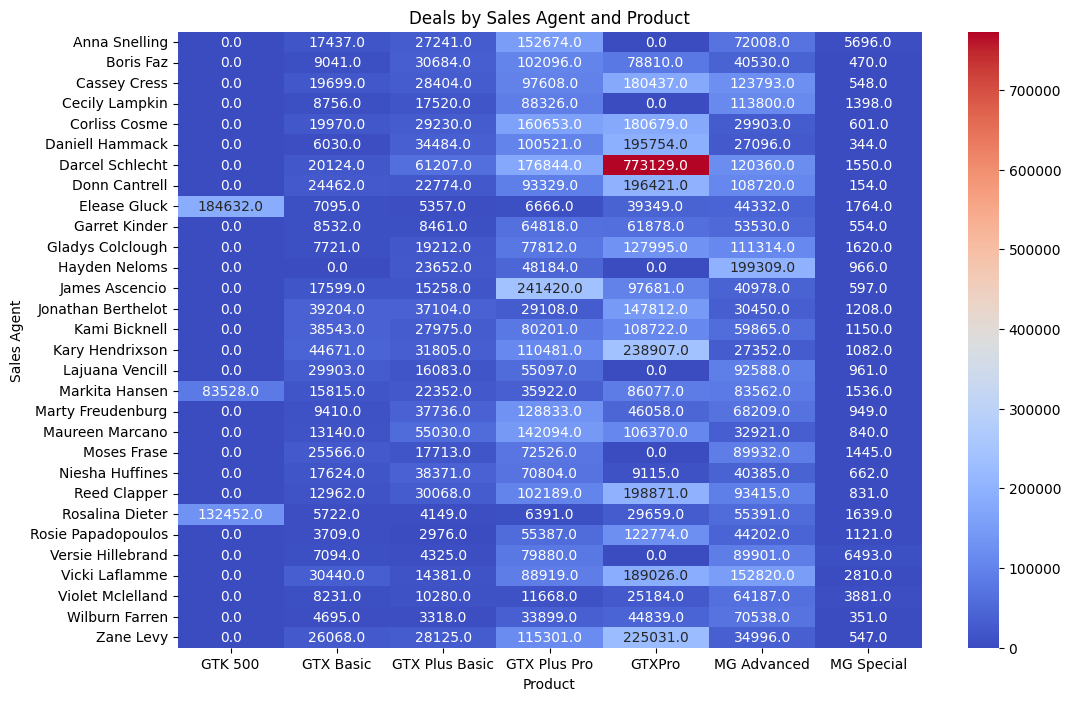

In [32]:
deals_by_agent_product = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].groupby(['sales_agent', 'product'])['close_value'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(deals_by_agent_product, cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Deals by Sales Agent and Product')
plt.xlabel('Product')
plt.ylabel('Sales Agent')
plt.show()